In [1]:
%config InlineBackend.figure_formats = ['svg']
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [2]:
url = r'https://www.meetup.com/mu_api/urlname/events/eventId/attendees?queries=%28endpoint%3Adata-mineurs%2Fevents%2F285658288%2Frsvps%2Cmeta%3A%28method%3Aget%29%2Cparams%3A%28desc%3A%21t%2Cfields%3A%27answers%2Cpay_status%2Cself%2Cweb_actions%2Cattendance_status%27%2Conly%3A%27answers%2Cresponse%2Cattendance_status%2Cguests%2Cmember%2Cpay_status%2Cupdated%27%2Corder%3Atime%29%2Cref%3AeventAttendees_data-mineurs_285658288%2Ctype%3Aattendees%29'

In [3]:
r = requests.get(url)

In [4]:
data = r.json()
attendees = data['responses'][0]['value']

In [5]:
lst = [
    {
        'ts': item['updated'],
        'name': item['member']['name'],
    }
    for item in attendees
]

In [6]:
df = pd.DataFrame.from_dict(lst)
df = df\
    .sort_values(by='ts', ascending=True)\
    .reset_index()
df['nr'] = df.index + 1
df['dt'] = pd.to_datetime(df['ts'], unit='ms')
df.set_index('ts', inplace=True)
del df['index']
df

,name,nr,dt
ts,,,
1651518053000,Virginie M.,1,2022-05-02 19:00:53
1651518120000,Quentin B.,2,2022-05-02 19:02:00
1651518395000,Thibaut G.,3,2022-05-02 19:06:35
1651519919000,Virginie M.,4,2022-05-02 19:31:59
1651569654000,Kris L.,5,2022-05-03 09:20:54
1651573974000,Margaux G.,6,2022-05-03 10:32:54
1651588918000,Nicolas I.,7,2022-05-03 14:41:58
1651614818000,Mehmet-Eren O.,8,2022-05-03 21:53:38
1651652085000,Olivier G.,9,2022-05-04 08:14:45


<AxesSubplot:xlabel='ts'>

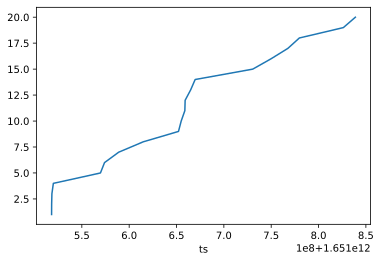

In [7]:
df['nr'].plot()

In [8]:
X = df.index.values.reshape(-1, 1)
y = df['nr'].values

In [9]:
model = LinearRegression().fit(X, y)

In [10]:
df['regress'] = model.predict(X)

In [11]:
df.set_index('dt', inplace=True)

<AxesSubplot:title={'center':'Nombre de participants'}, xlabel='dt'>

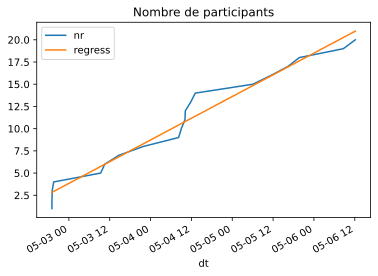

In [12]:
df[['nr', 'regress']].plot(title='Nombre de participants')

In [13]:
event_dt = datetime(2022, 6, 2, 19, 30)
prediction_event = model.predict([[event_dt.timestamp() * 1000]])[0]
df.loc[event_dt] = ['Prédiction', None, prediction_event]

In [14]:
df

,name,nr,regress
dt,,,
2022-05-02 19:00:53,Virginie M.,1,2.823532
2022-05-02 19:02:00,Quentin B.,2,2.827323
2022-05-02 19:06:35,Thibaut G.,3,2.842884
2022-05-02 19:31:59,Virginie M.,4,2.929119
2022-05-03 09:20:54,Kris L.,5,5.743339
2022-05-03 10:32:54,Margaux G.,6,5.987783
2022-05-03 14:41:58,Nicolas I.,7,6.833379
2022-05-03 21:53:38,Mehmet-Eren O.,8,8.298913
2022-05-04 08:14:45,Olivier G.,9,10.407640


<AxesSubplot:title={'center':'Nombre de participants (prédiction)'}, xlabel='dt'>

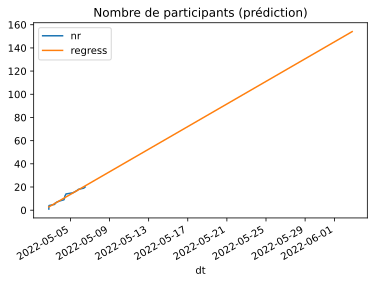

In [15]:
df[['nr', 'regress']].plot(title='Nombre de participants (prédiction)')

In [16]:
int(prediction_event)

154